# Basic Sequences

## Unit Sample (impulse) sequences


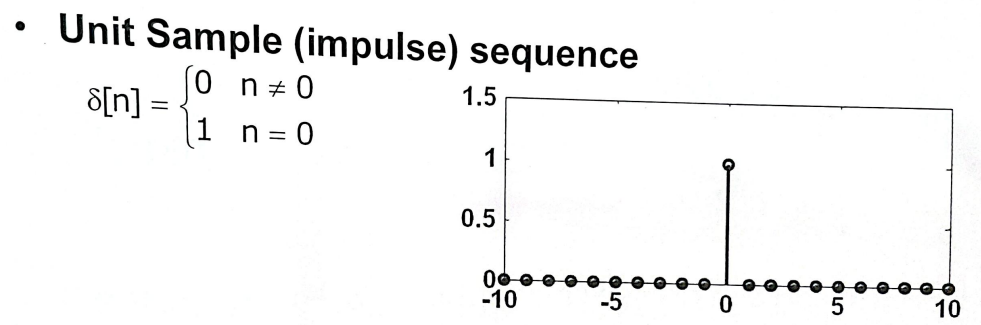

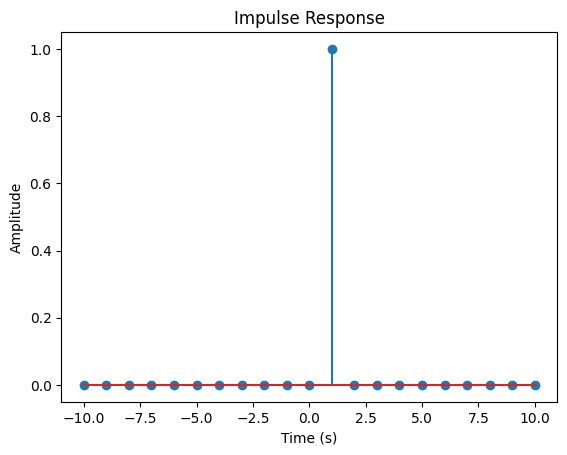

In [33]:
import numpy as np
from matplotlib import pyplot as plt

def impulse(begin, end, n, samples_per_second = 1):
    if end <= begin:
        raise ValueError('end must be greater than begin!')
    elif n > end or n < begin:
        raise IndexError('n must be between begin and end!')
    
    time = np.linspace(begin, end, (end - begin) * samples_per_second + 1,  endpoint = True)
    amplitude = np.zeros(shape = (end - begin) * samples_per_second + 1)    
    amplitude[(n - begin) * samples_per_second] = 1
    return amplitude, time

amplitude, time = impulse(-10, 10, 1)

plt.stem(time, amplitude)
plt.title('Impulse Response')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


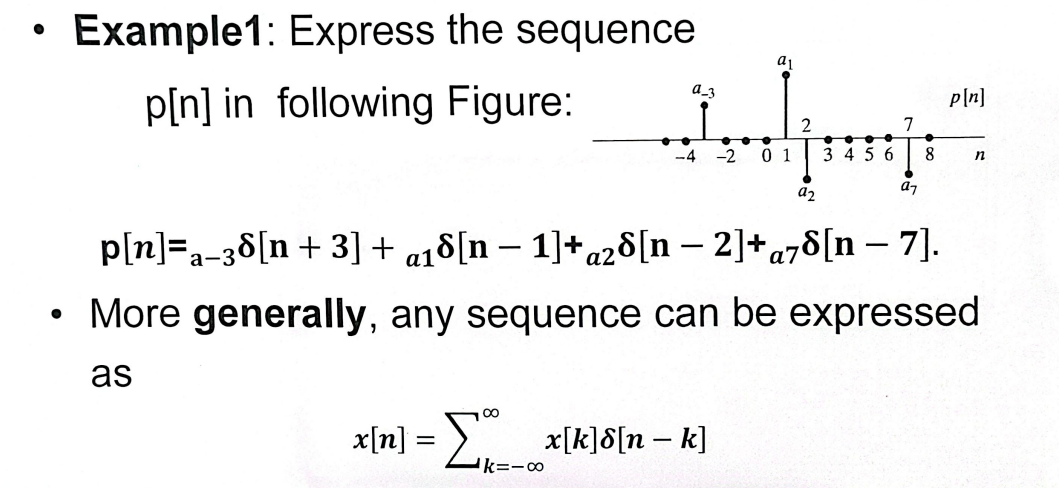

In code, $\delta[n + x]$ is represented as: impulse(begin, end, -x).

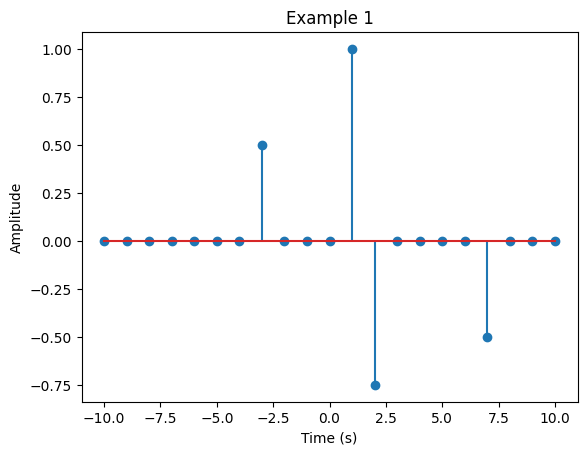

In [36]:
coefficients = [0.5, 1, -0.75, -0.5]
indexes = [-3, 1, 2, 7]

#get the first sample
p, time = impulse(-10, 10, indexes[0]) 
p *= coefficients[0]

#Add the remaining samples and multiply them by their coefficients:
for n, sign in zip(indexes[1:], coefficients[1:]):
    p += sign * impulse(-10, 10, n)[0]

plt.stem(time, p)
plt.title('Example 1')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

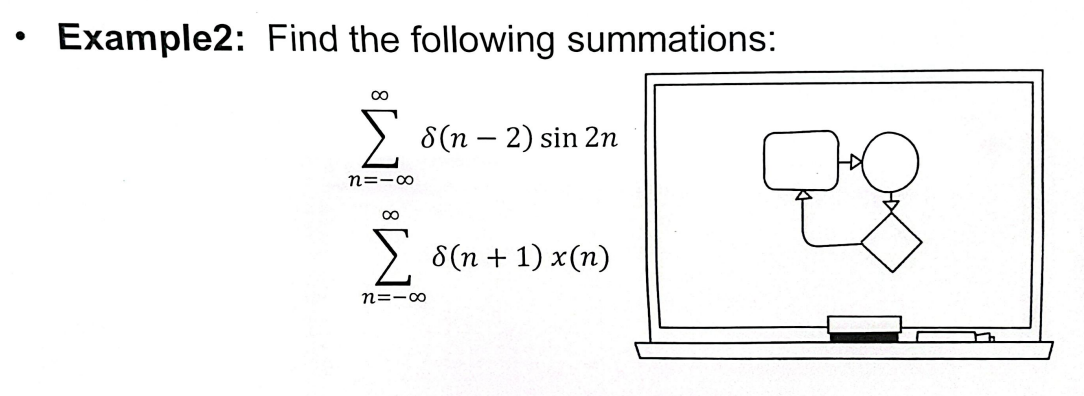

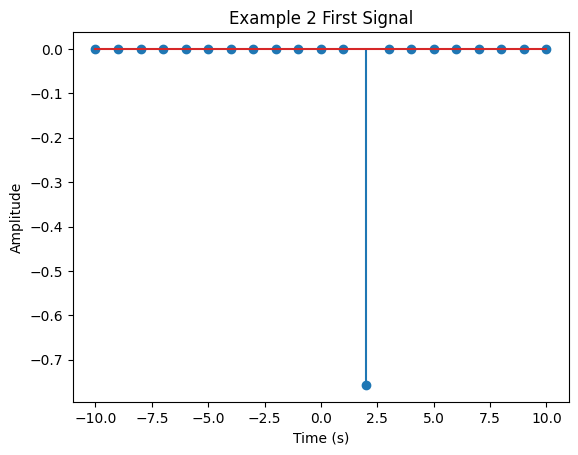

Summation: -0.7568024953079282


In [37]:
#First Signal
amplitude, time = impulse(-10, 10, 2)
sin_signal = np.sin(2 * time)
final_signal = amplitude * sin_signal
summation = np.sum(final_signal)

plt.stem(time, final_signal)
plt.title('Example 2 First Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()
print(f'Summation: {summation}')

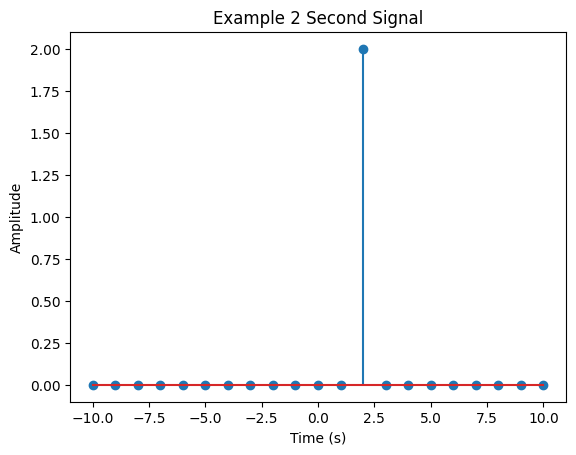

Summation: 2.0


In [38]:
#Second Signal
amplitude, time = impulse(-10, 10, 2)
x_signal = time #Since the output is equal to the input.
final_signal = amplitude * x_signal
summation = np.sum(final_signal)

plt.stem(time, final_signal)
plt.title('Example 2 Second Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()
print(f'Summation: {summation}')

## Unit Step Sequence

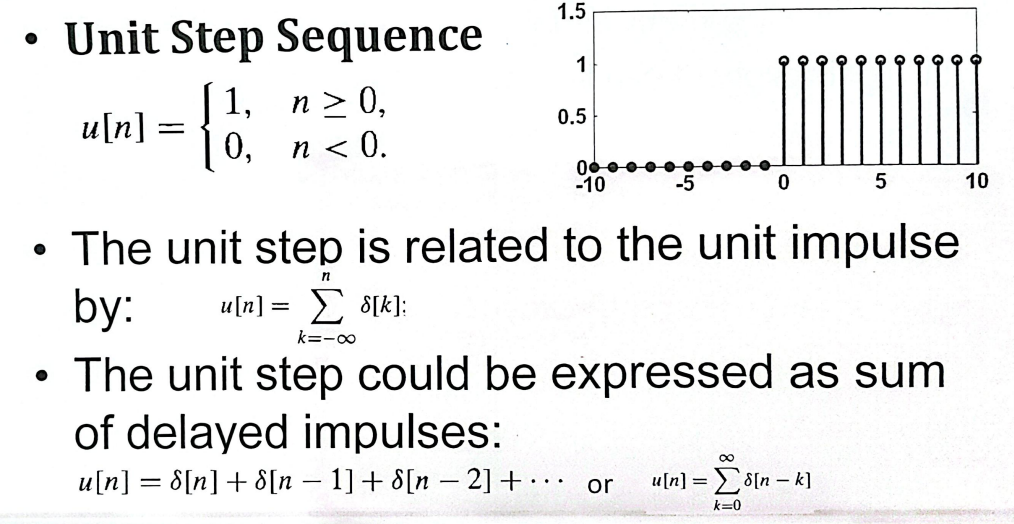

The following stack exchange explains how the unit step is related to the unit impulse: https://dsp.stackexchange.com/questions/48071/unit-step-signal-as-sum-of-impulses-from-mit-ocw-video

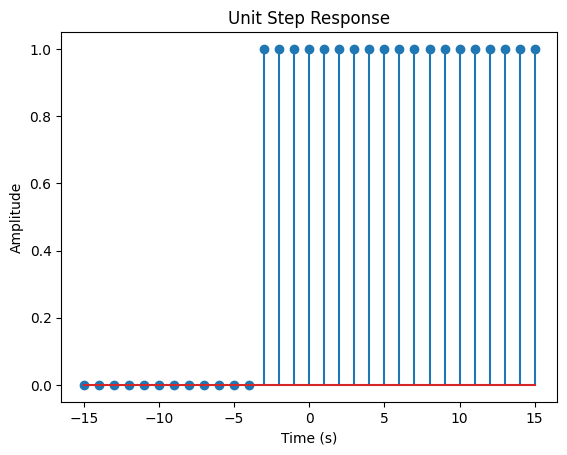

In [41]:
def step(begin, end, n, samples_per_second = 1):
    if end <= begin:
        raise ValueError('end must be greater than begin!')
    elif n > end or n < begin:
        raise IndexError('n must be between begin and end!')
    time = np.linspace(begin, end, (end - begin) * samples_per_second + 1, endpoint = True)
    amplitude = np.zeros(shape = ((end - begin) * samples_per_second + 1))
    amplitude[(n - begin)*samples_per_second:] = 1
    return amplitude, time

amplitude, time = step(-15, 15, -3)
plt.stem(time, amplitude)
plt.title('Unit Step Response')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

## Real Value Exponential Sequences

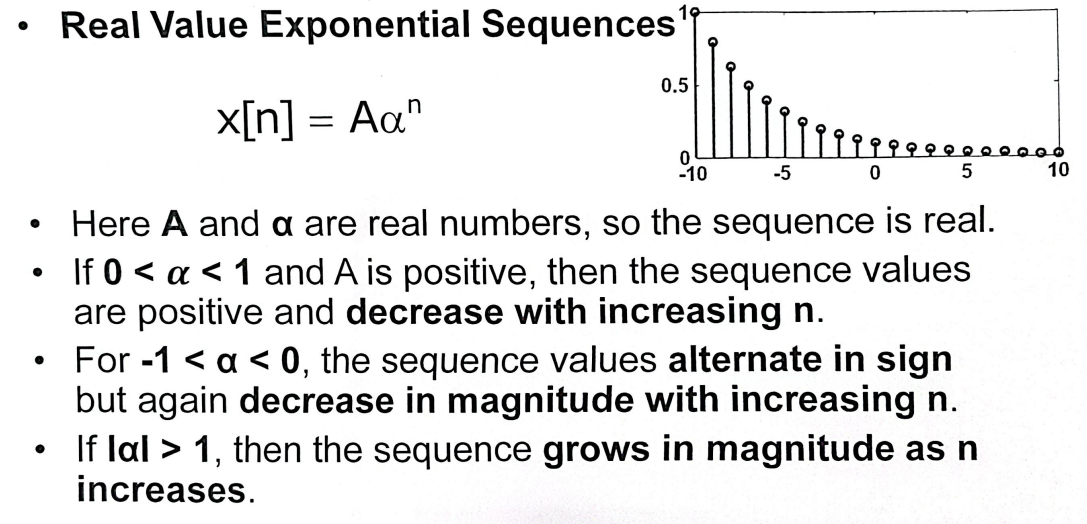

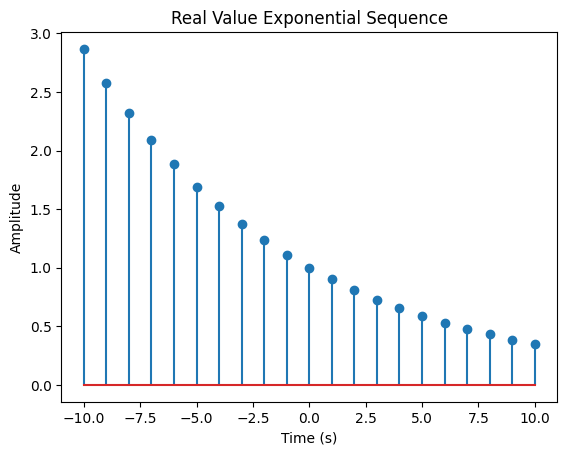

In [43]:
def exponential_sequence(begin, end, A, alpha, samples_per_second = 1):
    '''
    Implements: X[n] = A*alpha**(n),
    where A = scaling coefficient
    alpha = base
    n = exponent (time or x-axis)
    '''
    if end <= begin:
        raise ValueError('end must be greater than begin!')
    elif n > end or n < begin:
        raise IndexError('n must be between begin and end!')
    time = np.linspace(begin, end, (end - begin) * samples_per_second + 1, endpoint = True)
    amplitude = A*alpha**time
    
    return amplitude, time

amplitude, time = exponential_sequence(-10, 10, 1, 0.9)

plt.stem(time, amplitude)
plt.title('Real Value Exponential Sequence')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()
    

## Complex Value Exponential Sequences

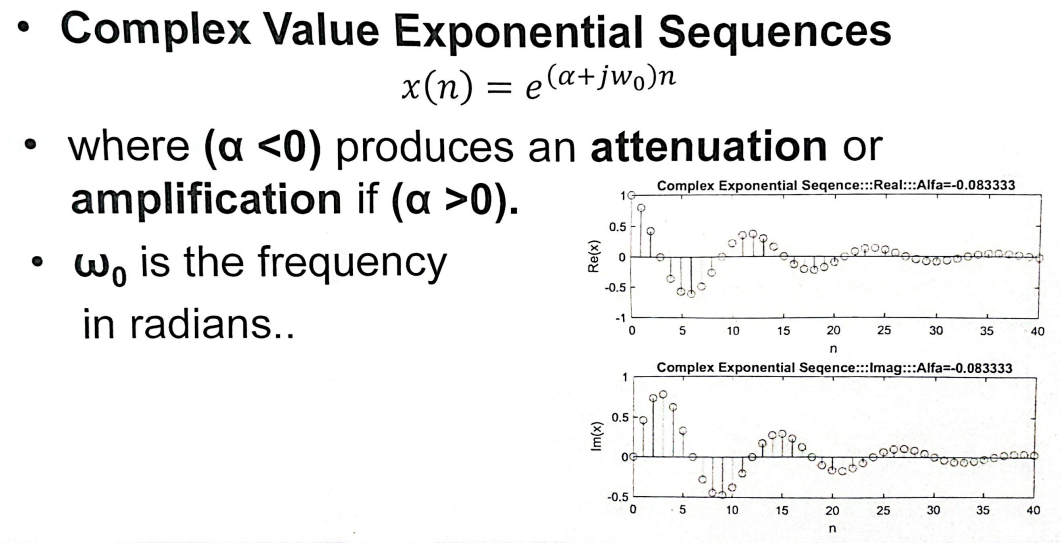

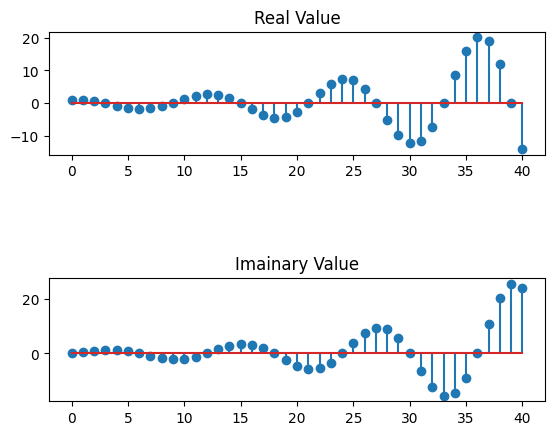

In [45]:
def complex_exponential_sequence(begin, end, alpha, w0, samples_per_second = 1):
    '''
    Implements x(n) = e**((alpha + j*w0)*n)
    alpha = attenuation scaler
    w0 = frequency in radians
    '''
    if end <= begin:
        raise ValueError('end must be greater than begin!')
    elif n > end or n < begin:
        raise IndexError('n must be between begin and end!')
    time = np.linspace(begin, end, (end - begin) * samples_per_second + 1, endpoint = True)
    amplitude = np.exp((alpha + w0*1j)*time)
    
    return amplitude, time

amplitude, time = complex_exponential_sequence(0, 40, 1/12, np.pi/6)

plt.subplots_adjust(hspace = 1)
plt.subplot(2,1,1)
plt.title('Real Value')
plt.stem(time, amplitude.real)
plt.subplot(2,1,2)
plt.title('Imainary Value')
plt.stem(time, amplitude.imag)
plt.show()
    

## Sinusoidal Exponential Sequences

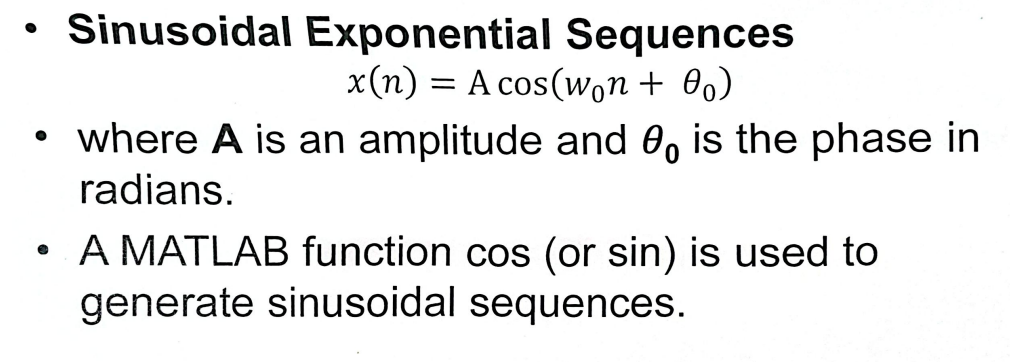

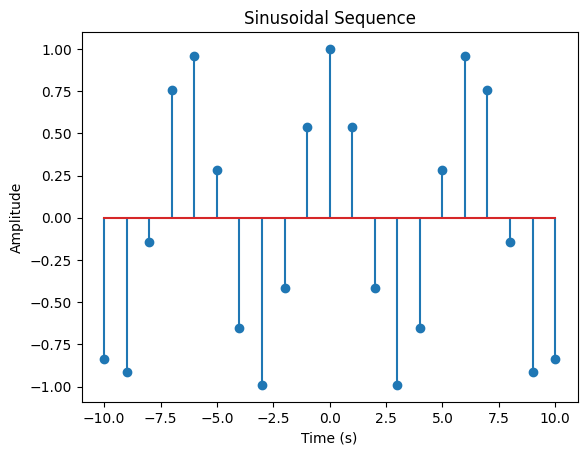

In [55]:
def sinusoidal_sequence(begin, end, A, w0, theta0, samples_per_second = 1):
    '''
    Implements: x(n) = A*cos(w0*n + theta0)
    A = scaler
    w0 = frequency
    theta0 = phase
    '''
    
    if end <= begin:
        raise ValueError('end must be greater than begin!')
    elif n > end or n < begin:
        raise IndexError('n must be between begin and end!')
    time = np.linspace(begin, end, (end - begin) * samples_per_second + 1, endpoint = True)
    amplitude = A*np.cos(w0 * time + theta0)
    
    return amplitude, time

amplitude, time = sinusoidal_sequence(-10, 10, 1, 1, 0)
plt.stem(time, amplitude)
plt.title('Sinusoidal Sequence')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()
    
    

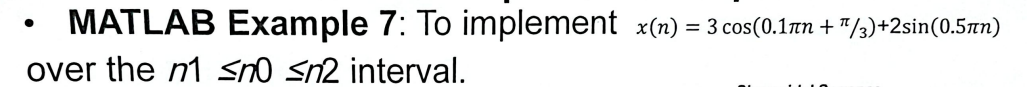

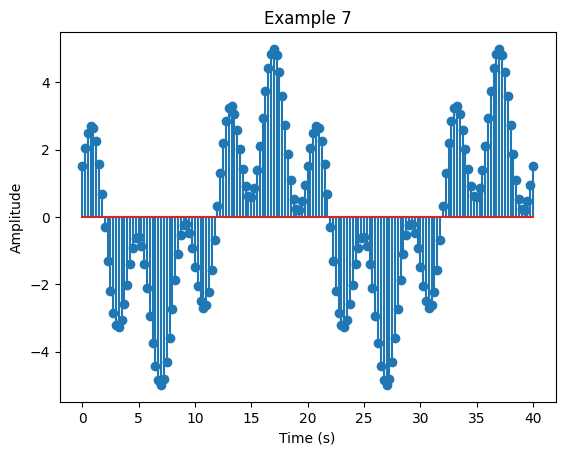

In [63]:
signal1, time = sinusoidal_sequence(0, 40, 3, 0.1*np.pi, np.pi/3, samples_per_second=4)

#theta0 = -np.pi/2 to make the cos wave a sin wave!
signal2, time = sinusoidal_sequence(0, 40, 2, 0.5*np.pi, theta0 = -np.pi/2, samples_per_second=4)
final_signal = signal1 + signal2

plt.stem(time, final_signal)
plt.title('Example 7')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

## Random Sequences

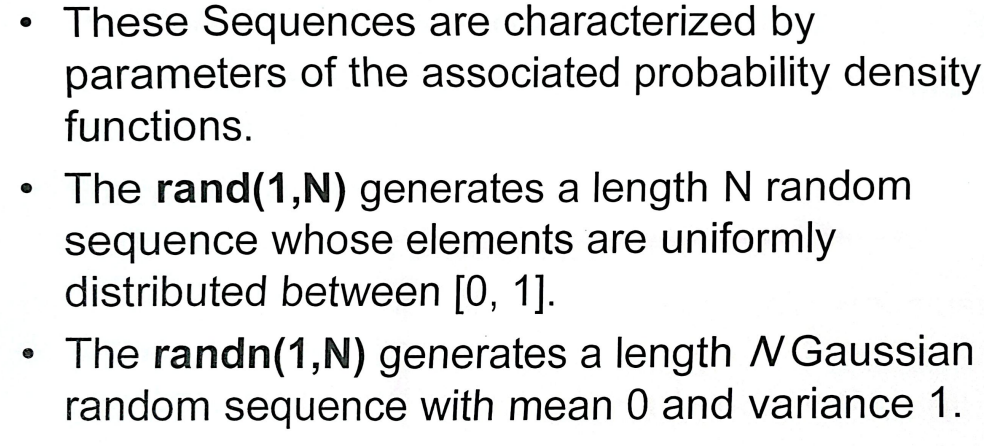

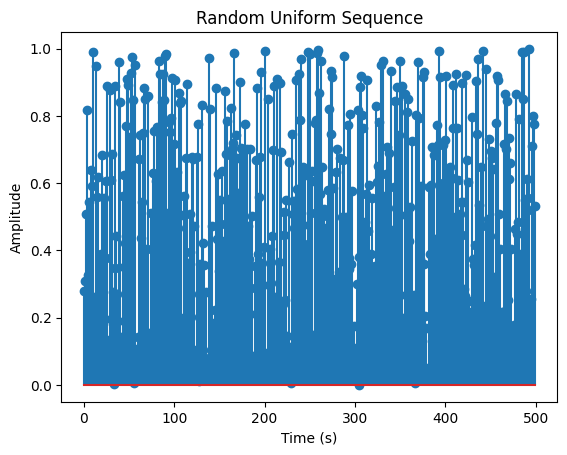

In [98]:
amplitude = np.random.rand(500)
plt.stem(amplitude)
plt.title('Random Uniform Sequence')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

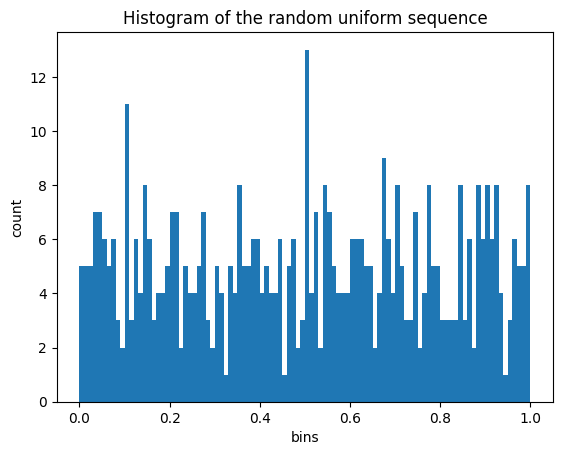

In [99]:
plt.hist(amplitude, 100, range = (0, 1))
plt.title('Histogram of the random uniform sequence')
plt.xlabel('bins')
plt.ylabel('count')
plt.show()

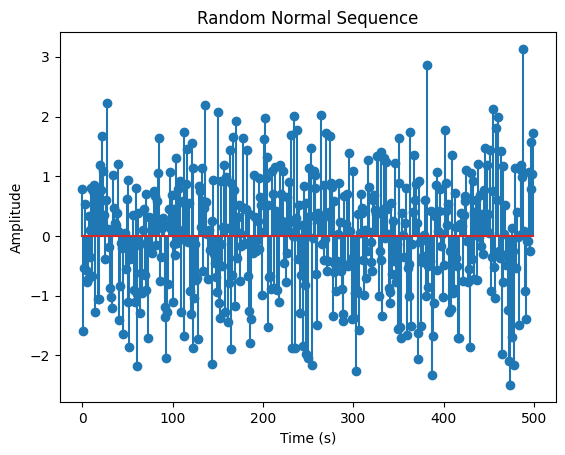

In [100]:
amplitude = np.random.randn(500)

plt.stem(amplitude)
plt.title('Random Normal Sequence')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

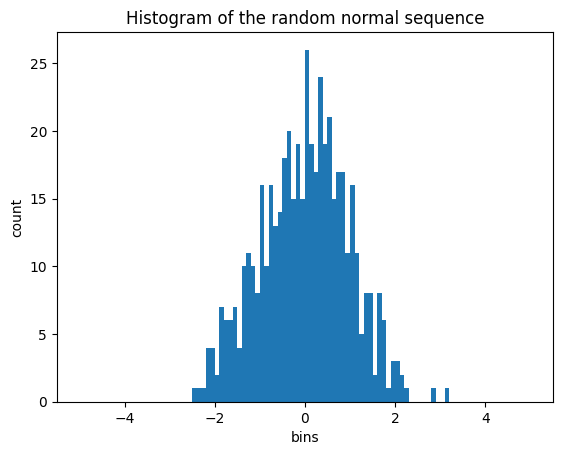

In [101]:
plt.hist(amplitude, 100, range = (-5, 5))
plt.title('Histogram of the random normal sequence')
plt.xlabel('bins')
plt.ylabel('count')
plt.show()

## Periodic sequences

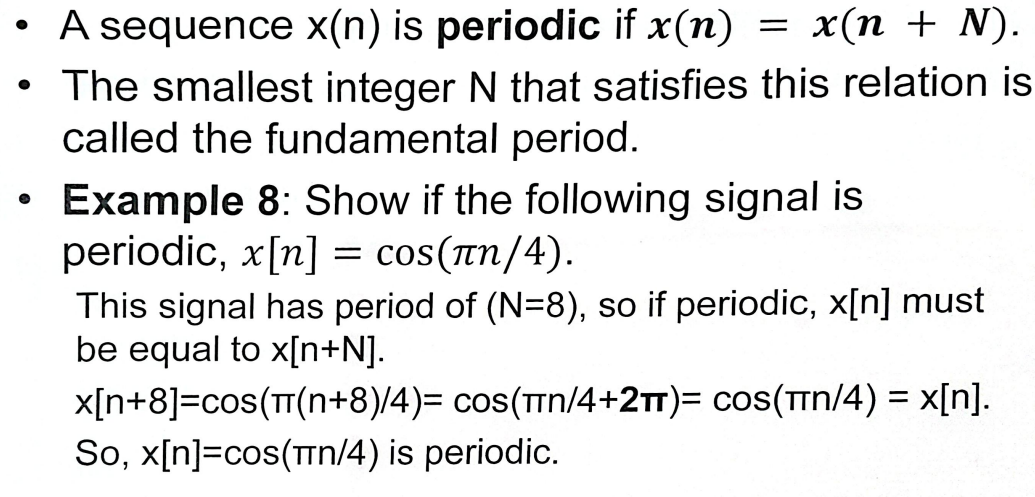

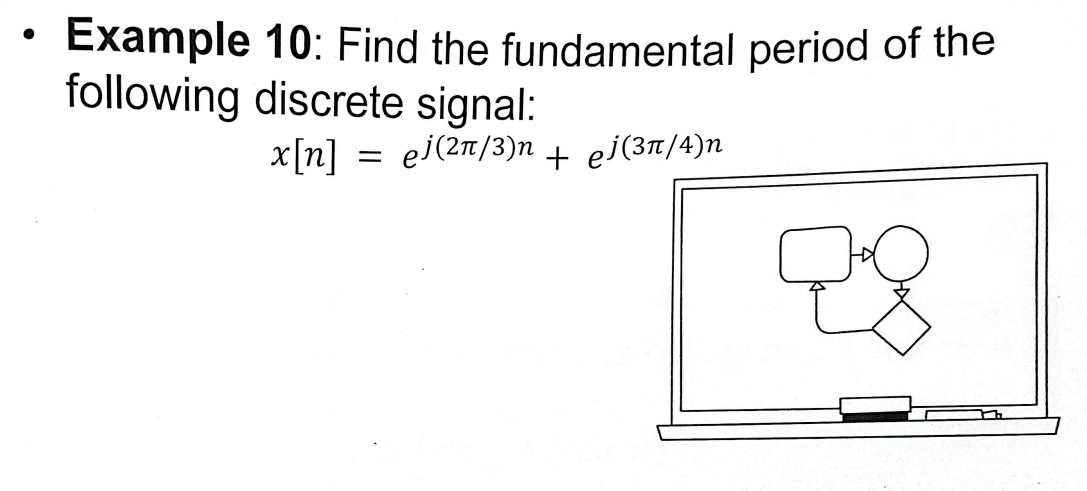

In [124]:
begin, end, samples_per_second = -40, 40, 2
time = np.linspace(begin, end, (end - begin) * samples_per_second + 1, endpoint = True)
x = np.exp(2*np.pi/3 * 1j * time) + np.exp(3*np.pi/4 * 1j * time)

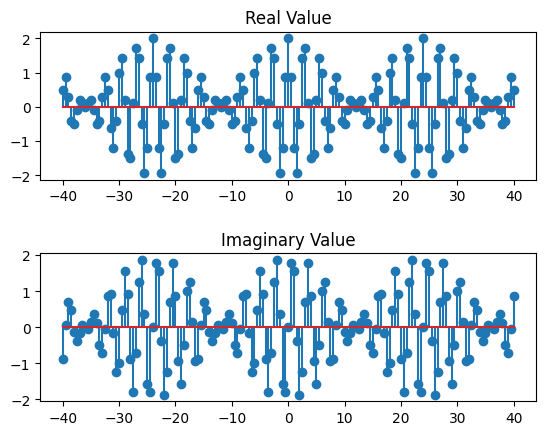

In [125]:
plt.subplots_adjust(hspace = 0.5)
plt.subplot(2, 1, 1)
plt.stem(time, x.real)
plt.title('Real Value')

plt.subplot(2, 1, 2)
plt.stem(time, x.imag)
plt.title('Imaginary Value')

plt.show()


From the above figure, we can determine that the real and imaginary values repeat every 24 seconds, which makes the period equal to 24!

Solution by hand:

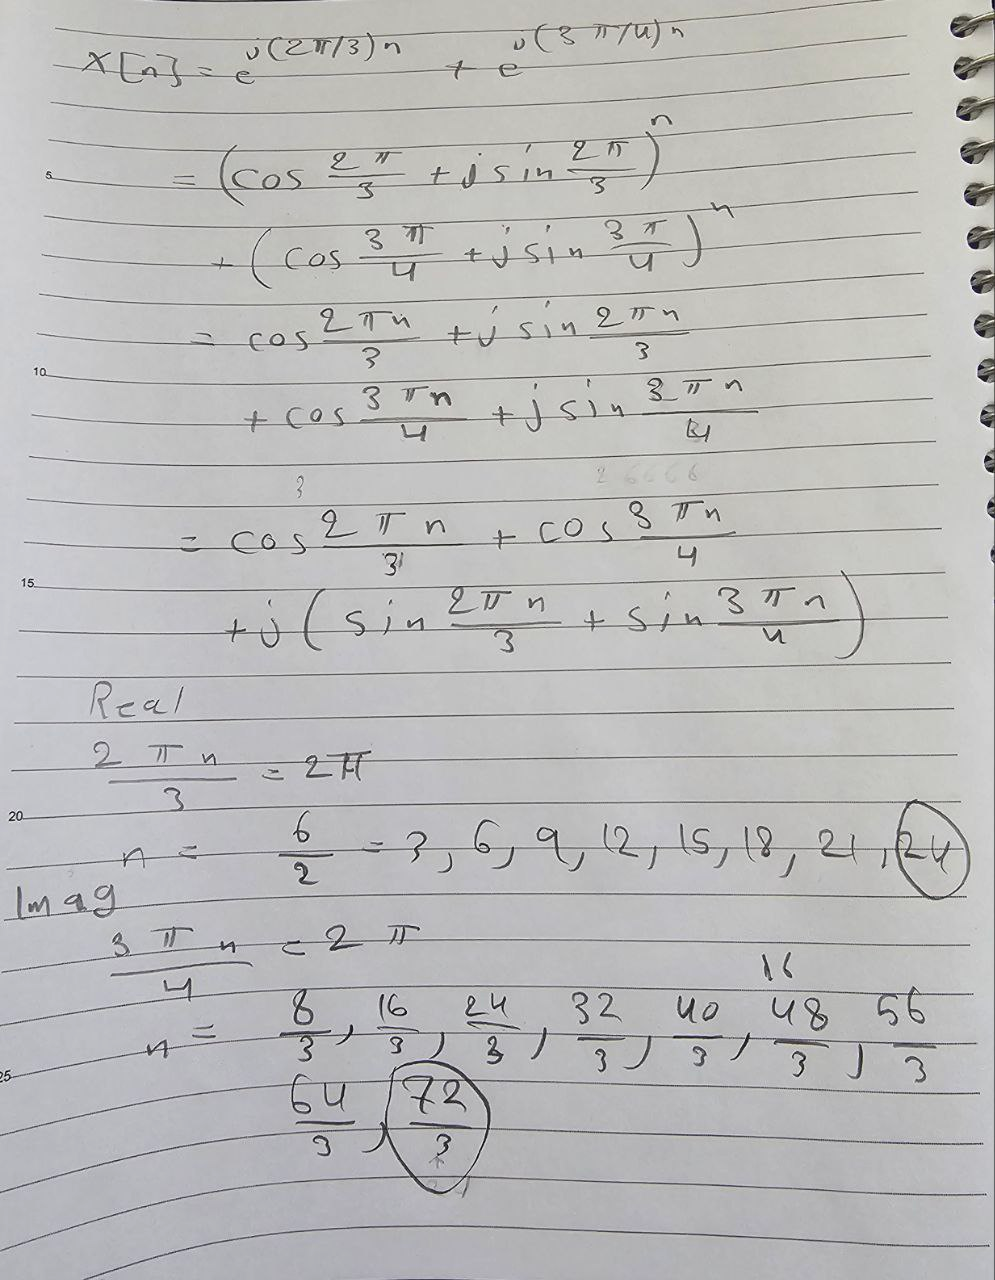

# Operations on Sequences

## Addition

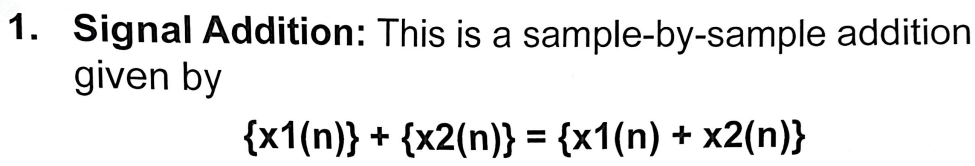

## Multiplication

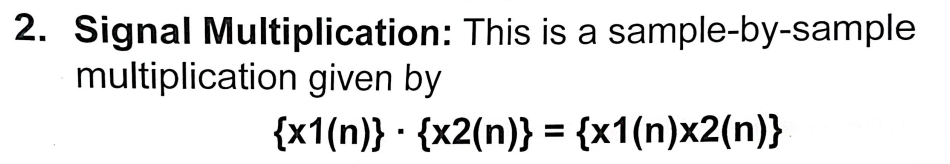

## Scaling

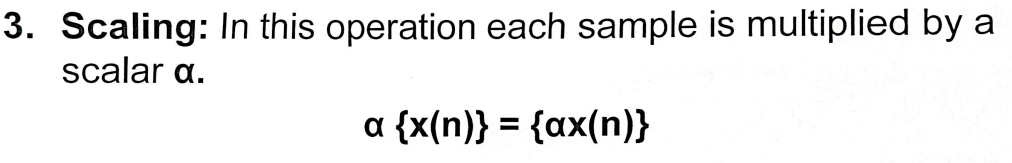

## Shifting

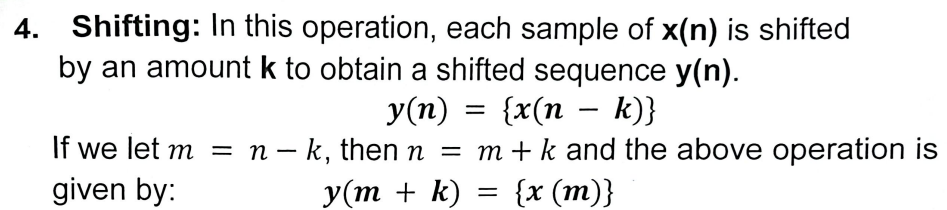

## Folding

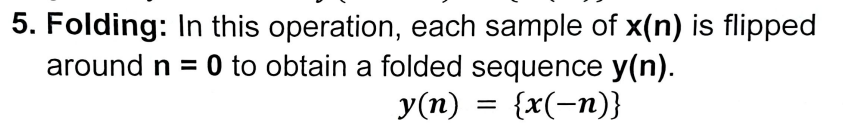

## Summation

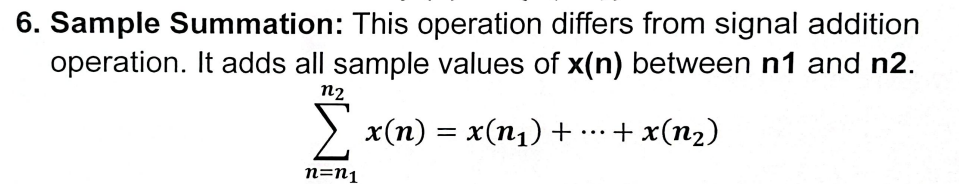

## Product

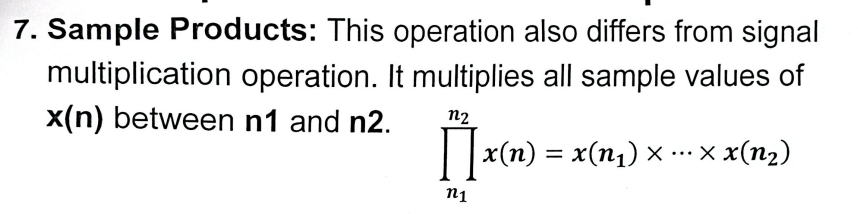

## Signal Energy

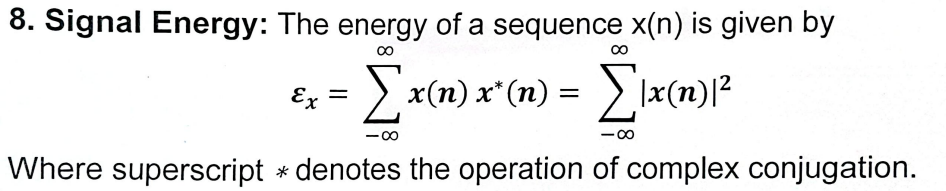

## Signal Power

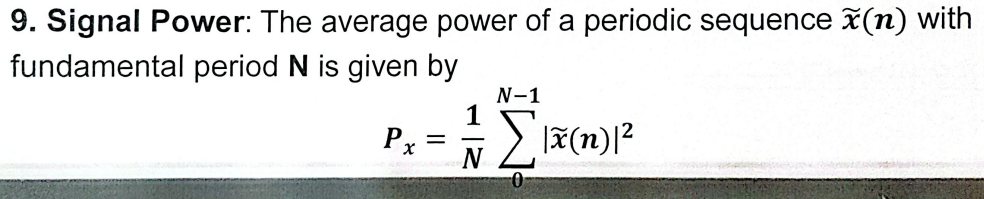

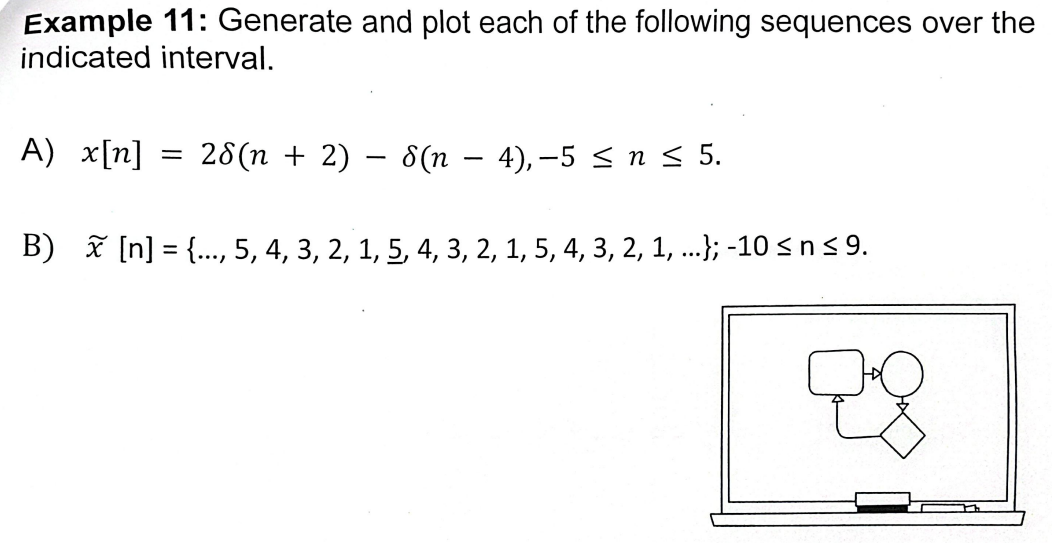

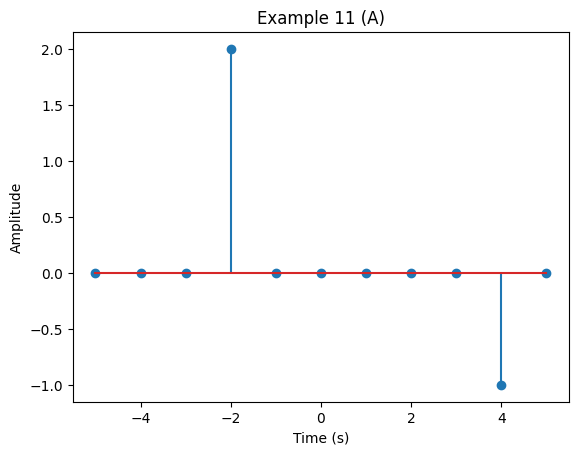

In [147]:
#A)
amplitude, time = impulse(-5, 5, -2)
amplitude *= 2
amplitude += -impulse(-5, 5, 4)[0] 

plt.stem(time, amplitude)
plt.title('Example 11 (A)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

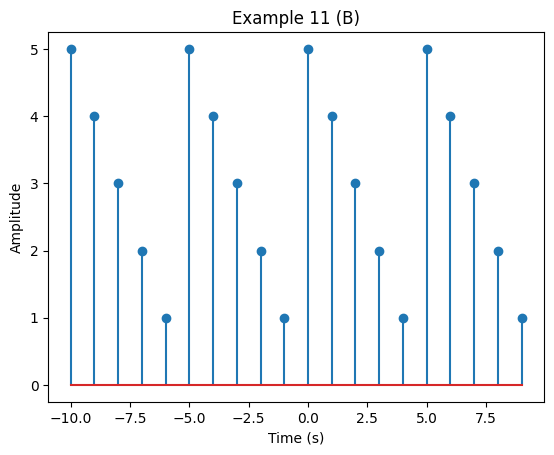

In [150]:
#B)
amplitude = np.array([5, 4, 3, 2, 1]*4)
time = np.arange(-10, 10)

plt.stem(time, amplitude)
plt.title('Example 11 (B)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

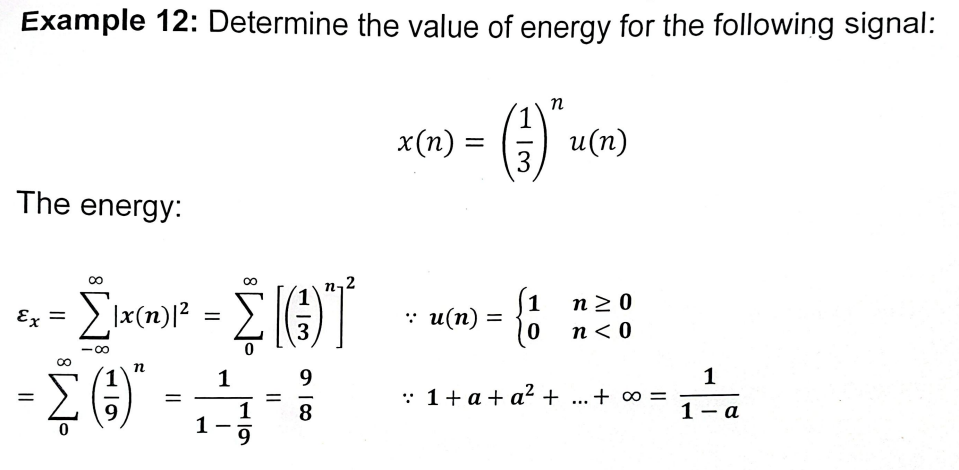

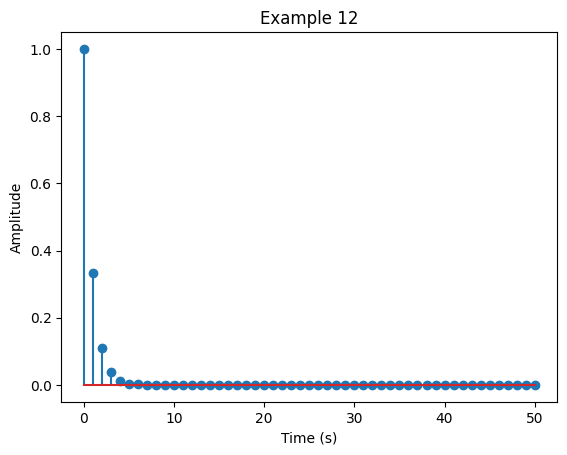

In [162]:
amplitude, time = step(0, 50, 0)
amplitude *= 1/3**time

plt.stem(time, amplitude)
plt.title('Example 12')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [166]:
energy = np.sum(amplitude ** 2)
#compare the solution by hand to the one generated by code!
np.allclose(energy, 9/8), energy, 9/8

(True, np.float64(1.1249999999999998), 1.125)